In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer

## Uploading Data and Preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Eluvio_DS_Challenge.csv')

In [ ]:
data.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [ ]:
print (data.shape)

(509236, 8)


In [ ]:
print (data.columns)

Index(['time_created', 'date_created', 'up_votes', 'down_votes', 'title',
       'over_18', 'author', 'category'],
      dtype='object')


In [ ]:
data.dropna().shape #no missing data

(509236, 8)

In [ ]:
text = data['title']
print (text[20])

Possible  Guantanamo  on UK soil?  [video]


## Sentence Splitting

In [ ]:
nltk.download('punkt')

# Let's play around with the first document from the list of documents 'text' 
doc = text[1]
# split the document into sentences
sents = nltk.sent_tokenize(doc)
print ('There are %d sentences in this document ', len(sents))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
There are %d sentences in this document  1


### First tried with one sentence (title)

In [ ]:
tokens = nltk.word_tokenize(sents[0])
tokens

['Japan', 'resumes', 'refuelling', 'mission']

In [ ]:
print ('Sentence BEFORE lowecase all tokens')
print (tokens)
# Normalize the tokens

normalized_tokens = [t.lower() for t in tokens]
print ('\nSentence AFTER lowecase all tokens')
print ( normalized_tokens)

print ('\n notice the words The, Vancomycin, Botulinum')

Sentence BEFORE lowecase all tokens
['Japan', 'resumes', 'refuelling', 'mission']

Sentence AFTER lowecase all tokens
['japan', 'resumes', 'refuelling', 'mission']

 notice the words The, Vancomycin, Botulinum


In [ ]:
print ('normaized tokens BEFORE stemming ')
print (normalized_tokens)
print ('\nnormaized tokens AFTER stemming ')
print ([nltk.PorterStemmer().stem(t) for t in normalized_tokens])
#chopped ~ed, ~e

normaized tokens BEFORE stemming 
['japan', 'resumes', 'refuelling', 'mission']

normaized tokens AFTER stemming 
['japan', 'resum', 'refuel', 'mission']


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#### Lemmatization is an option if needed

In [ ]:
lemmatizer = WordNetLemmatizer() 

print ('normaized tokens BEFORE lemmatization ')
print (normalized_tokens)
print ('\nnormaized tokens AFTER lemmatization')
print ([WordNetLemmatizer().lemmatize(t,pos='v') for t in normalized_tokens])

print ('\n The words effected are: resume, refuel')

normaized tokens BEFORE lemmatization 
['japan', 'resumes', 'refuelling', 'mission']

normaized tokens AFTER lemmatization
['japan', 'resume', 'refuel', 'mission']

 The words effected are: resume, refuel


### Tokenization of the entire data

In [ ]:
tokens_of_Documents = [nltk.word_tokenize(doc) for doc in text]

In [ ]:
data

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [ ]:
print ("The text comprises %d documents." % len(tokens_of_Documents))
print ('\n Here are the first 3 documents')
for i in range (0,3):
    print (tokens_of_Documents[i])

The text comprises 509236 documents.

 Here are the first 3 documents
['Scores', 'killed', 'in', 'Pakistan', 'clashes']
['Japan', 'resumes', 'refuelling', 'mission']
['US', 'presses', 'Egypt', 'on', 'Gaza', 'border']


In [ ]:
#combine all the tokens in all documents into a list of tokens
tokens_all = list(itertools.chain.from_iterable(tokens_of_Documents))
print (len(tokens_all))

7913476


In [ ]:
# convert list of tokens to nltk text object
final_tokens = nltk.Text(t.lower() for t in tokens_all)

In [ ]:
print ("The text comprises %d normalized tokens." % len(final_tokens))
print ("The first few are", final_tokens[0:10])

The text comprises 7913476 normalized tokens.
The first few are ['scores', 'killed', 'in', 'pakistan', 'clashes', 'japan', 'resumes', 'refuelling', 'mission', 'us']


In [ ]:
fdist = FreqDist(final_tokens)

In [ ]:
fdist.most_common(10)

[('the', 211961),
 ('to', 211658),
 ('in', 207745),
 (',', 182435),
 ('of', 174341),
 ('.', 128392),
 ('a', 107655),
 ('s', 103561),
 (':', 86874),
 ('and', 86611)]

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Finding words associated with high up_votes

In [ ]:
# created a dictionary of {word : total up_votes} to see what words are related to higher up_votes; could be used for future reference when choosing topic/ title
vote = {}
for i in range(len(tokens_of_Documents)):
  for j in tokens_of_Documents[i]:
    j = j.lower()
    up = data.iloc[i,2]
    if j not in stop_words:
      if j not in vote:
        vote[j] = up
      else:
        vote[j] += up

In [ ]:
sorted(vote, key = vote.get, reverse=True)[:30]

[',',
 '.',
 ':',
 '’',
 '-',
 'says',
 'us',
 'world',
 'new',
 'government',
 'people',
 '$',
 'russia',
 'police',
 'china',
 'years',
 'isis',
 'first',
 'president',
 '‘',
 'north',
 'u.s.',
 'uk',
 'korea',
 'said',
 '”',
 '“',
 'one',
 'russian',
 'state']

Above is the list of words with the total highest up_votes; other than the punctuation marks, it seems that these words migh be able to bring high number of up_votes: 'us', 'world', 'new', 'government', 'people', '$', 'russia', 'police', 'china', 'years', 'isis', 'first', 'president', and etc. This can also imply that people are interested in these topics and that pay a lot of attention to related issues.

I could have added the up_votes and minused the down_votes but I just decided to only count up_votes. We could also find what words are associated with high down_votes in a very similar way.

Depending on the context, high down_votes could mean many things. Maybe people down_vote for the poor quality of the content, but it could also be that the topic itself is sad or tragic that people down_vote to show their feelings toward it. (people could also up_vote for the sad/ tragic contents as well)

Therefore, I could also add up_vote and down_vote to show which words are very controversial/ popular (bring a lot of people's attention).

In [ ]:
tokens_withno_stopwords = []
for w in final_tokens: 
    if w not in stop_words: 
      if w not in [',','.',':','-',"'","(",")","?","!"]:
        tokens_withno_stopwords.append(w)   

print ("The number of tokens is %d ; BEFORE stop words removal" % len(final_tokens))            
print ("The number of tokens is %d ; AFTER stop words removal" % len(tokens_withno_stopwords))

The number of tokens is 7913476 ; BEFORE stop words removal
The number of tokens is 5261300 ; AFTER stop words removal


#### Finding most commonly used words

In [ ]:
fdist = FreqDist(tokens_withno_stopwords)
fdist.most_common(10)

[('’', 39471),
 ('china', 25758),
 ('says', 25415),
 ('us', 23540),
 ('new', 23326),
 ('syria', 18783),
 ('russia', 18112),
 ('world', 17857),
 ('police', 16583),
 ('iran', 15473)]

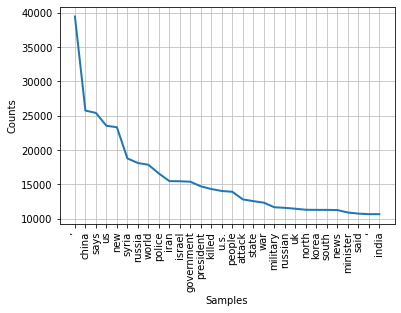

In [ ]:
fdist.plot(30) 

As I plot the frequency distribution of words from the data, we can tell that especially country names appear common in the titles. This is not surprising as the category is worldnews so it makes sense that the titles mention country names often.

In [ ]:
# define the model by setting the parameters to desired values
tf_vectorizer = CountVectorizer(max_features=30,
                                ngram_range=(1, 2), 
                                stop_words='english' )

# apply the vectorizer to the "text" data
tf = tf_vectorizer.fit_transform(text)
#print the features
tf_vectorizer.get_feature_names()

['000',
 'attack',
 'china',
 'government',
 'india',
 'iran',
 'israel',
 'killed',
 'korea',
 'military',
 'minister',
 'new',
 'news',
 'north',
 'people',
 'police',
 'president',
 'russia',
 'russian',
 'said',
 'says',
 'south',
 'state',
 'syria',
 'syrian',
 'uk',
 'ukraine',
 'war',
 'world',
 'year']

In [ ]:
#transform the vectorizeroutput into a dense representation
pd.DataFrame(tf.todense(),columns=tf_vectorizer.get_feature_names())

,000,attack,china,government,india,iran,israel,killed,korea,military,minister,new,news,north,people,police,president,russia,russian,said,says,south,state,syria,syrian,uk,ukraine,war,world,year
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
509232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
509233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
509234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tf_vectorizer = CountVectorizer(max_features=20,
                                ngram_range=(1,3), 
                                stop_words='english' )
# apply the vectorizer to the "text" data
tf = tf_vectorizer.fit_transform(text[:40000])
full_matrix = pd.DataFrame(tf.todense(), columns=tf_vectorizer.get_feature_names())

Although I was thinking maybe I could build a classifier to predict which category the title would belong to, I realized there was only one category: 'worldnews' so this wouldn't work.